In [1]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
import mdp
import numpy as np
import sklearn as sl
from sklearn import datasets
#import system_parameters
import scipy
import scipy.interpolate as interpolate
# tabular layout from https://stackoverflow.com/questions/25830780/tabular-legend-layout-for-matplotlib
from matplotlib.font_manager import FontProperties
from matplotlib.patches import Rectangle
from utils import *
import time
from datetime import datetime

In [2]:
def plot_mnist_errorbars(y1, ery1, y2, ery2, y3, ery3, samples_lengths, title1, title, style='-',
                         y_upper=0.53, y_lower=.285, x_upper=12.05, x_lower=3.95):
    y1 = np.array(y1); ery1 = np.array(ery1); y2 = np.array(y2); ery2 = np.array(ery2); y3 = np.array(y3);
    ery3 = np.array(ery3)
    fig = plt.figure(figsize=(7, 6)) 
    ax = plt.subplot(111)
    samples_lengths = [4, 6, 8, 10, 12]
    
    x = np.array(samples_lengths)

    ew = 0.3
    ct = 0.3
    
    im2 = ax.errorbar(samples_lengths, y1, ery1, capthick=ct, elinewidth=ew, color=get_kelly_colors()[4],  label="CNN-1", linestyle=style)
    im8 = ax.errorbar(samples_lengths, y2, ery2, capthick=ct, elinewidth=ew, color= get_kelly_colors()[5],  label="CNN-2", linestyle=style)
    im1 = ax.errorbar(samples_lengths, y3, ery3, capthick=ct, elinewidth=ew, color=get_kelly_colors()[1],  label="HiGSFA", linestyle=style)

    # create blank rectangle

    #Create organized list containing all handles for table. Extra re
    plt.xlabel(title1)
    plt.ylabel('Classification accuracy')
    plt.title(title)
    plt.legend(bbox_to_anchor=(0.875, -0.1), ncol=3)
    plt.xlim(x_lower, x_upper)
    plt.ylim(y_lower, y_upper)
    plt.show()


def plot_omniglot_errorbars(y1, ery1, y2, ery2, y3, ery3,
                            x1, erx1, x2, erx2, x3, erx3,
                            z1, erz1, z2, erz2, z3, erz3, samples_lengths, title1, title):
    
    fig = plt.figure(figsize=(7, 6)) 
    ax = plt.subplot(111)
    
    samples_lengths = samples_lengths
    
    y_12 = x1
    y_22 = x2
    y_22CNN2 = x3
    
    y_13 = z1
    y_23 = z2
    y_23CNN2 = z3
    x = np.array(samples_lengths)

    # example error bar values that vary with x-position
    error = 0.001 + 0.0005 * x
    ew = 0.3
    ct = 0.3
    im1 = ax.errorbar(samples_lengths, y1, ery1, capthick=ct, elinewidth=ew,  color=get_kelly_colors()[4],  label="HiGSFA")
    im2 = ax.errorbar(samples_lengths, y2, ery2, capthick=ct,elinewidth=ew,color=get_kelly_colors()[5],  label="CNN-1")
    im8 = ax.errorbar(samples_lengths, y3, ery3, capthick=ct,elinewidth=ew,color= get_kelly_colors()[1],  label="CNN-2")
    
    im4 = ax.errorbar(samples_lengths, x1, erx1,capthick=ct,  elinewidth=ew,color=get_kelly_colors()[4],  label="HiGSFA", linestyle="--")
    im5 = ax.errorbar(samples_lengths, x2, erx2,capthick=ct,  elinewidth=ew,color=get_kelly_colors()[5],  label="CNN-1", linestyle="--")
    im9 = ax.errorbar(samples_lengths, x3, erx3,capthick=ct,  elinewidth=ew,color=get_kelly_colors()[1],  label="CNN-2", linestyle="--")

    im6 = ax.errorbar(samples_lengths, z1, erz1,capthick=ct,  elinewidth=ew,color=get_kelly_colors()[4],  label="HiGSFA", linestyle="-.")
    im7 = ax.errorbar(samples_lengths, z2, erz2,capthick=ct,  elinewidth=ew,color=get_kelly_colors()[5],  label="CNN-1", linestyle="-.")
    im10 = ax.errorbar(samples_lengths, z3, erz3,capthick=ct,  elinewidth=ew,color=get_kelly_colors()[1],  label="CNN-2", linestyle="-.")


    # create blank rectangle
    extra = Rectangle((0, 0), 1, 1, fc="w", fill=True, edgecolor='none', linewidth=0)

    #Create organized list containing all handles for table. Extra represent empty space
    legend_handle = [
                     extra, extra, extra, extra, extra, 
                     extra, extra, im1, im2, im8, 
                     extra, extra, im4, im5, im9,  
                     extra,extra, im6, im7, im10]

    #Define the labels
    label_row_1 = ["", r"", r"CNN-1", r"CNN-2", r"HiGSFA"]
    label_j_1 = [r"#0"] 
    label_j_2 = [r"#1"]
    label_j_3 = [r"#2"]
    label_empty = [""]

    #organize labels for table construction
    legend_labels = np.concatenate([
                                    label_row_1,
                                    [""],
                                    label_j_1,
                                    label_empty * 4,
                                    label_j_2,
                                    label_empty * 4,
                                    label_j_3, 
                                    label_empty * 4,
                                   label_empty * 5])


    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])

    # Put a legend below current axis
    ax.legend(legend_handle, legend_labels, bbox_to_anchor=(1.3, 1.019),
              loc = 9, ncol = 4, shadow = True, handletextpad = -1.5)
    plt.xlabel(title1)
    plt.ylabel('Classification accuracy')
    plt.title(title)

    plt.text(1.38, 0.962,'Challenge',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax.transAxes,
            zorder = 10,
            fontsize=12)
    
    plt.xlim(3.95, 12.05)
    plt.ylim(0.3, 0.55)
    plt.show()


    
    #######################################


samples_lengths = [4, 6, 8, 10, 12]
samples_lengths = [3, 10, 20]

x = np.array(samples_lengths)
y_1 = [0.181578947368, 0.273684210526, 0.265789473684]
y_2 = [0.3315, 0.32575, 0.35525]
y_2CNN2 = [0.33025, 0.3555, 0.34175]

y_12 = [0.228947368421, 0.265789473684, 0.289473684211]
y_22 = [0.3125, 0.342, 0.38175]
y_22CNN2 = [0.318, 0.3395, 0.33325]

y_13 = [0.194736842105, 0.255263157895, 0.255263157895]
y_23 = [0.324, 0.37525, 0.39675]
y_23CNN2 = [0.3175, 0.3595, 0.35525]
title = "title"
title1 = "alphabets"
#plot_omniglot_errorbars(y_1, y_2, y_2CNN2, y_12, y_22, y_22CNN2, y_13, y_23, y_23CNN2, samples_lengths, title1,
#                         title)

In [3]:
total_successes = np.load("total_successes.npy")
total_lengths = np.load("total_lengths.npy")
total_accuracies = np.load("total_accuracies.npy")

In [4]:
nums = ["10", "12", "4", "6", "8"]
models = ["cnn_1", "cnn_2", "higsfa"]

In [5]:
def fix_omniglot_array(to_num):
    to_num[0], to_num[2] = to_num[2], to_num[0]
    to_num[1], to_num[3] = to_num[3], to_num[1]
    to_num[2], to_num[4] = to_num[4], to_num[2]
    to_num[3], to_num[4] = to_num[4], to_num[3]
    return to_num

In [6]:
omniglot_results = []
omniglot_stdev = []
for j in range(3):
    print("model: " + models[j])
    for i in range(3):
        print("challenge " + str(i))
        divided_matrix = np.divide(total_successes[j, i, :, 0, 1], total_lengths[j, i, :, 0, 1])
        to_num = np.nan_to_num(divided_matrix)
        fix_omniglot_array(to_num)
        interesting_accuracies = total_accuracies[j, i, :, 0, 1]
        interesting_accuracies = fix_omniglot_array(interesting_accuracies)
        print(to_num)
        omniglot_results.append(to_num)
        omniglot_stdev.append(interesting_accuracies)
        print(np.sum(to_num) / 9.0)
        print("\n")
omniglot_results = np.array(omniglot_results)
omniglot_stdev = np.array(omniglot_stdev)

model: cnn_1
challenge 0
[ 0.48709677  0.49322581  0.46741935  0.48096774  0.45967742]
0.265376344086


challenge 1
[ 0.43133858  0.44165354  0.45086614  0.44685039  0.44716535]
0.246430446194


challenge 2
[ 0.38278481  0.38240506  0.41708861  0.40949367  0.42531646]
0.224120956399


model: cnn_2
challenge 0
[ 0.46194801  0.47129032  0.47741935  0.4772043   0.45774194]
0.260622658361


challenge 1
[ 0.43669031  0.44267717  0.4607874   0.44952756  0.45779528]
0.249719746244


challenge 2
[ 0.39252916  0.39392405  0.43405063  0.41911392  0.42443038]
0.229338683434


model: higsfa
challenge 0
[ 0.38612903  0.41483871  0.41032258  0.40548387  0.42645161]
0.227025089606


challenge 1
[ 0.3284252   0.36251969  0.37787402  0.38448819  0.39173228]
0.205004374453


challenge 2
[ 0.28873418  0.31113924  0.34949367  0.34974684  0.35493671]
0.183783403657




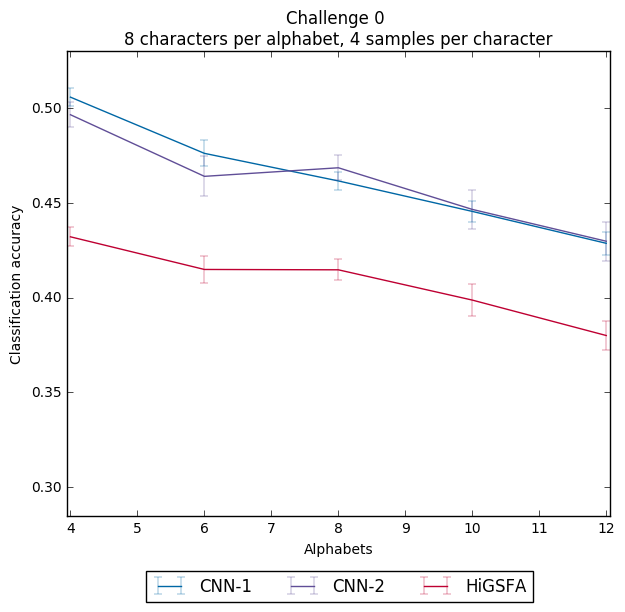

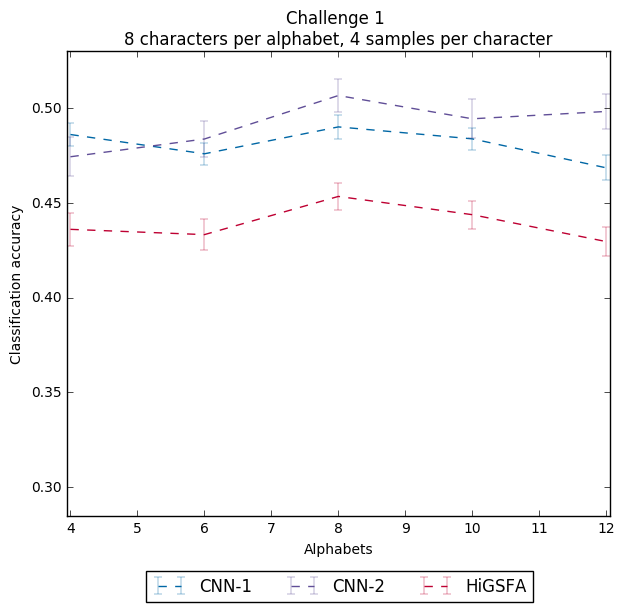

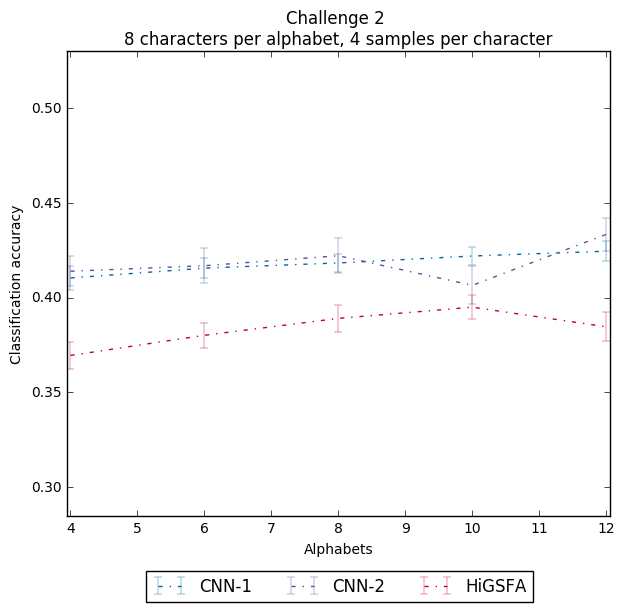

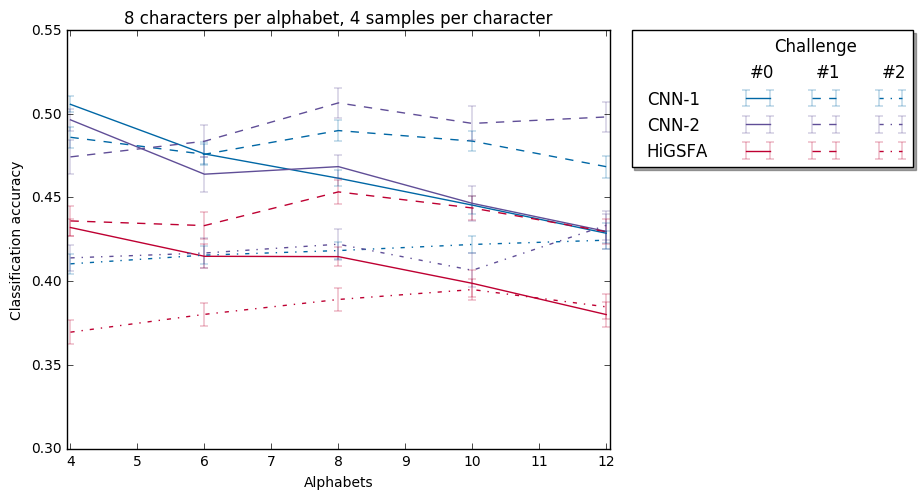

In [15]:
samples_lengths = [4, 6, 8, 10, 12]
title = "Alphabets"
title1 = "8 characters per alphabet, 4 samples per character"

plot_mnist_errorbars(omniglot_results[0], omniglot_stdev[0], omniglot_results[1], omniglot_stdev[1],
                         omniglot_results[2], omniglot_stdev[2], samples_lengths, title, 
                        "Challenge 0 \n" + title1 )
plot_mnist_errorbars(omniglot_results[3], omniglot_stdev[3], omniglot_results[4], omniglot_stdev[4],
                         omniglot_results[5], omniglot_stdev[5], samples_lengths, title, 
                        "Challenge 1 \n" + title1, '--')
plot_mnist_errorbars(omniglot_results[6], omniglot_stdev[6], omniglot_results[7], omniglot_stdev[7],
                         omniglot_results[8], omniglot_stdev[8], samples_lengths, title, 
                        "Challenge 2 \n" + title1 , '-.')


plot_omniglot_errorbars(omniglot_results[0], omniglot_stdev[0], omniglot_results[1], omniglot_stdev[1],
                         omniglot_results[2], omniglot_stdev[2],
                         omniglot_results[3], omniglot_stdev[3], omniglot_results[4], omniglot_stdev[4],
                         omniglot_results[5], omniglot_stdev[5],
                         omniglot_results[6], omniglot_stdev[6], omniglot_results[7], omniglot_stdev[7],
                         omniglot_results[8], omniglot_stdev[8], samples_lengths,
                         title,
                         title1)

In [8]:
omniglot_results = []
omniglot_stdev = []
for j in range(3):
    print("model: " + models[j])
    for i in range(3):
        print("challenge " + str(i))
        divided_matrix = np.divide(total_successes[j, i, :, 0, 0], total_lengths[j, i, :, 0, 0])
        to_num = np.nan_to_num(divided_matrix)
        fix_omniglot_array(to_num)
        interesting_accuracies = total_accuracies[j, i, :, 0, 0]
        interesting_accuracies = fix_omniglot_array(interesting_accuracies)
        print(to_num)
        omniglot_results.append(to_num)
        omniglot_stdev.append(interesting_accuracies)
        print(np.sum(to_num) / 9.0)
        print("\n")
omniglot_results = np.array(omniglot_results)
omniglot_stdev = np.array(omniglot_stdev)

model: cnn_1
challenge 0
[ 0.47464567  0.47141732  0.4453937   0.45478657  0.44385827]
0.254455725929


challenge 1
[ 0.4816129   0.48548387  0.44645161  0.45398981  0.45193548]
0.257719298246


challenge 2
[ 0.39443038  0.42632911  0.39867089  0.3988008   0.39848101]
0.22407913243


model: cnn_2
challenge 0
[ 0.45472441  0.4703937   0.48362205  0.48306462  0.48488189]
0.264076296019


challenge 1
[ 0.47354839  0.49322581  0.49419355  0.51373955  0.49064516]
0.273928049914


challenge 2
[ 0.40379747  0.4343038   0.44367089  0.44653919  0.44911392]
0.241936140288


model: higsfa
challenge 0
[ 0.39283465  0.40023622  0.42188976  0.42818898  0.43015748]
0.230367454068


challenge 1
[ 0.40451613  0.42032258  0.40645161  0.43483871  0.43580645]
0.233548387097


challenge 2
[ 0.34822785  0.37088608  0.39493671  0.40025316  0.38797468]
0.211364275668




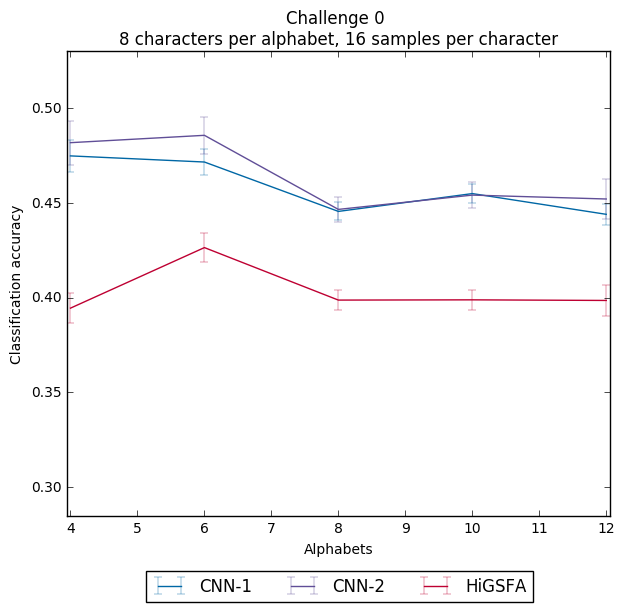

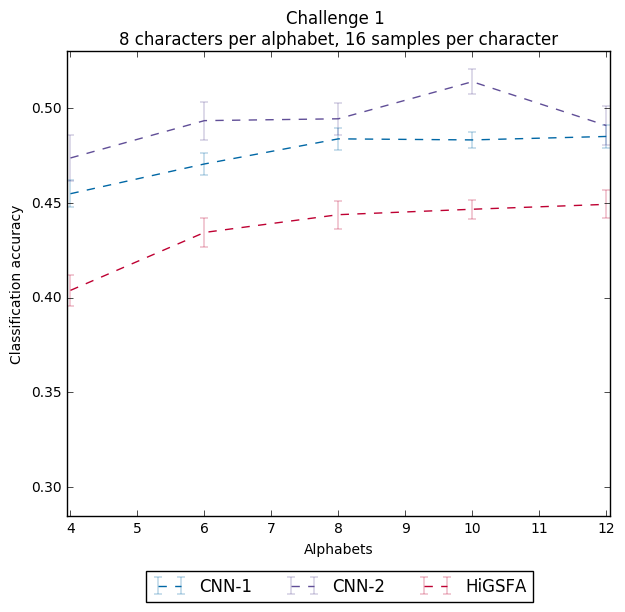

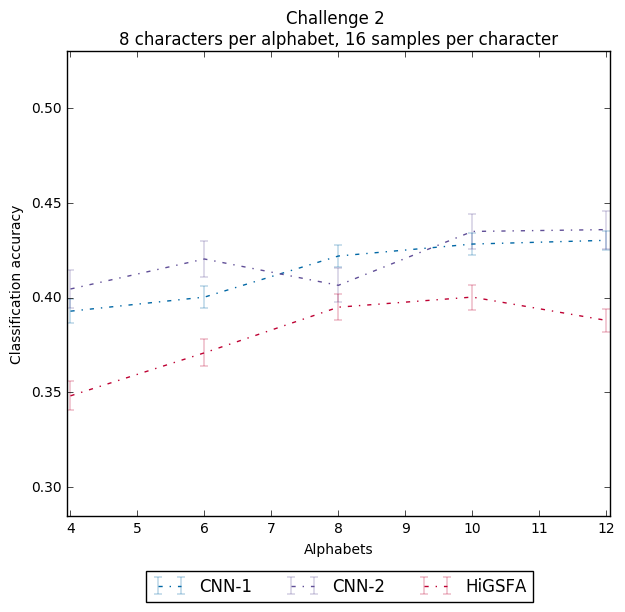

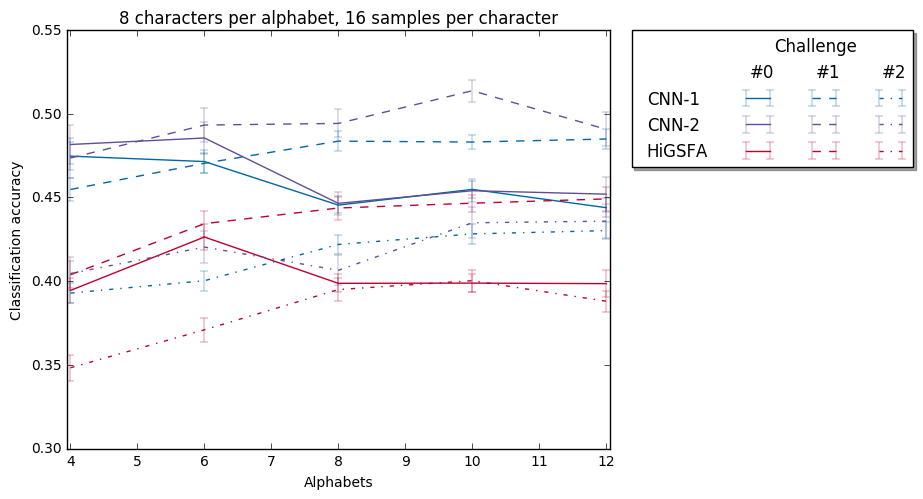

In [9]:
samples_lengths = [4, 6, 8, 10, 12]
title = "Alphabets"
title1 = "8 characters per alphabet, 16 samples per character"
plot_mnist_errorbars(omniglot_results[0], omniglot_stdev[0], omniglot_results[1], omniglot_stdev[1],
                         omniglot_results[2], omniglot_stdev[2], samples_lengths, title, 
                        "Challenge 0 \n" + title1 )
plot_mnist_errorbars(omniglot_results[3], omniglot_stdev[3], omniglot_results[4], omniglot_stdev[4],
                         omniglot_results[5], omniglot_stdev[5], samples_lengths, title, 
                        "Challenge 1 \n" + title1, '--')
plot_mnist_errorbars(omniglot_results[6], omniglot_stdev[6], omniglot_results[7], omniglot_stdev[7],
                         omniglot_results[8], omniglot_stdev[8], samples_lengths, title, 
                        "Challenge 2 \n" + title1 , '-.')
plot_omniglot_errorbars(omniglot_results[0], omniglot_stdev[0], omniglot_results[1], omniglot_stdev[1],
                         omniglot_results[2], omniglot_stdev[2],
                         omniglot_results[3], omniglot_stdev[3], omniglot_results[4], omniglot_stdev[4],
                         omniglot_results[5], omniglot_stdev[5],
                         omniglot_results[6], omniglot_stdev[6], omniglot_results[7], omniglot_stdev[7],
                         omniglot_results[8], omniglot_stdev[8], samples_lengths,
                         title,
                         title1)

In [10]:
omniglot_results = []
omniglot_stdev = []
for j in range(3):
    print("model: " + models[j])
    for i in range(3):
        print("challenge " + str(i))
        divided_matrix = np.divide(total_successes[j, i, 4, :, 1], total_lengths[j, i, 4, :, 1])
        to_num = np.nan_to_num(divided_matrix)
        fix_omniglot_array(to_num)
        interesting_accuracies = total_accuracies[j, i, 4, :, 1]
        interesting_accuracies = fix_omniglot_array(interesting_accuracies)
        print(to_num)
        omniglot_results.append(to_num)
        omniglot_stdev.append(interesting_accuracies)
        print(np.sum(to_num) / 9.0)
        print("\n")
omniglot_results = np.array(omniglot_results)
omniglot_stdev = np.array(omniglot_stdev)

model: cnn_1
challenge 0
[ 0.52333333  0.48419355  0.48870968  0.46741935  0.47166521]
0.270591236398


challenge 1
[ 0.45204724  0.4419685   0.45102362  0.45086614  0.45094701]
0.249650280201


challenge 2
[ 0.40864979  0.4078481   0.40575949  0.41708861  0.41236173]
0.227967524487


model: cnn_2
challenge 0
[ 0.48548387  0.48225806  0.46290323  0.47741935  0.45032258]
0.262043010753


challenge 1
[ 0.45818898  0.45307087  0.44543307  0.4607874   0.44275591]
0.25113735783


challenge 2
[ 0.4335443   0.43329114  0.42392405  0.43405063  0.40582278]
0.236736990155


model: higsfa
challenge 0
[ 0.42290323  0.41064516  0.41302382  0.41032258  0.41551459]
0.230267708598


challenge 1
[ 0.34488189  0.36779528  0.37574509  0.37787402  0.38342707]
0.205524815629


challenge 2
[ 0.31658228  0.3356962   0.34230451  0.34949367  0.35099458]
0.188341248247




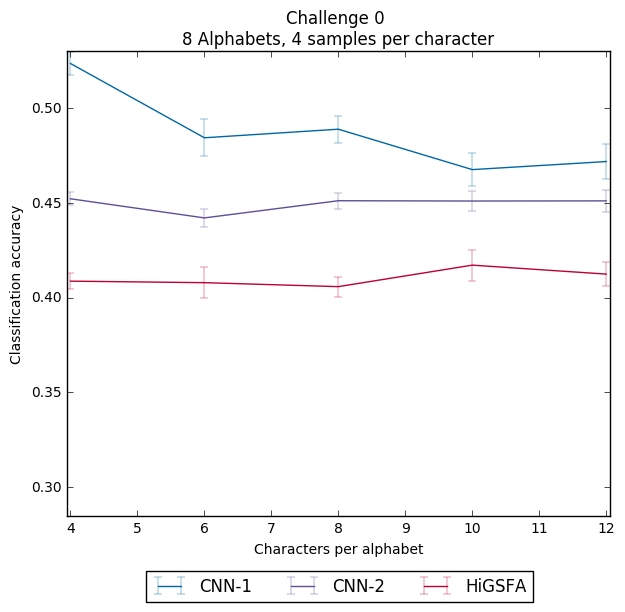

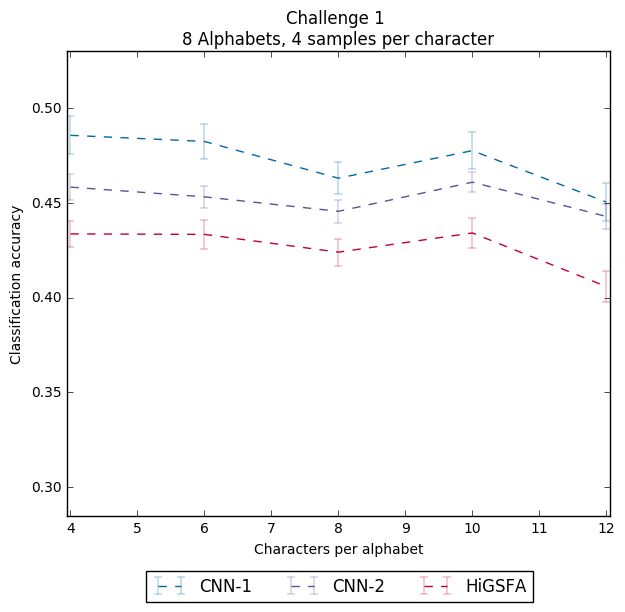

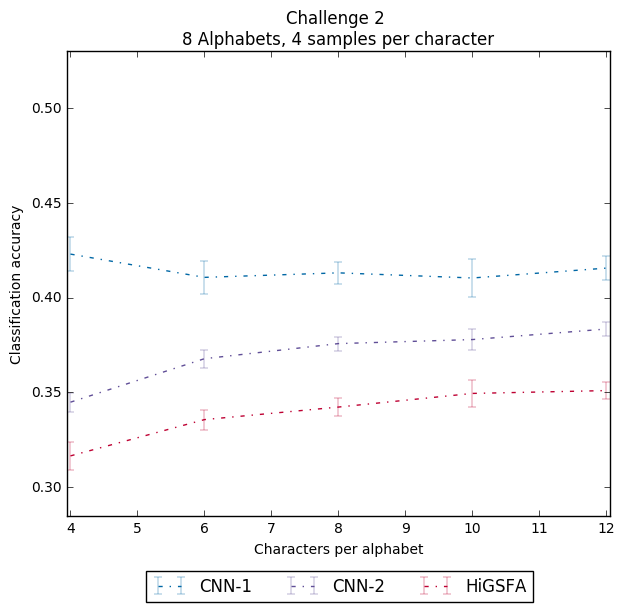

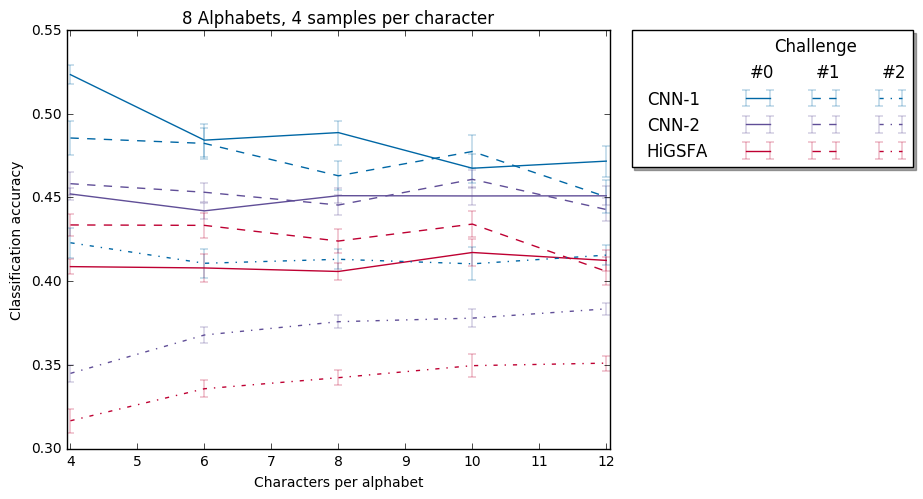

In [11]:
samples_lengths = [4, 6, 8, 10, 12]
title = "Characters per alphabet"
title1 = "8 Alphabets, 4 samples per character"
plot_mnist_errorbars(omniglot_results[0], omniglot_stdev[0], omniglot_results[1], omniglot_stdev[1],
                         omniglot_results[2], omniglot_stdev[2], samples_lengths, title, 
                        "Challenge 0 \n" + title1 )
plot_mnist_errorbars(omniglot_results[3], omniglot_stdev[3], omniglot_results[4], omniglot_stdev[4],
                         omniglot_results[5], omniglot_stdev[5], samples_lengths, title, 
                        "Challenge 1 \n" + title1, '--')
plot_mnist_errorbars(omniglot_results[6], omniglot_stdev[6], omniglot_results[7], omniglot_stdev[7],
                         omniglot_results[8], omniglot_stdev[8], samples_lengths, title, 
                        "Challenge 2 \n" + title1 , '-.')
plot_omniglot_errorbars(omniglot_results[0], omniglot_stdev[0], omniglot_results[1], omniglot_stdev[1],
                         omniglot_results[2], omniglot_stdev[2],
                         omniglot_results[3], omniglot_stdev[3], omniglot_results[4], omniglot_stdev[4],
                         omniglot_results[5], omniglot_stdev[5],
                         omniglot_results[6], omniglot_stdev[6], omniglot_results[7], omniglot_stdev[7],
                         omniglot_results[8], omniglot_stdev[8], samples_lengths,
                         title,
                         title1)

In [12]:
omniglot_results = []
omniglot_stdev = []
for j in range(3):
    print("model: " + models[j])
    for i in range(3):
        print("challenge " + str(i))
        divided_matrix = np.divide(total_successes[j, i, 4, :, 0], total_lengths[j, i, 4, :, 0])
        to_num = np.nan_to_num(divided_matrix)
        fix_omniglot_array(to_num)
        interesting_accuracies = total_accuracies[j, i, 4, :, 0]
        interesting_accuracies = fix_omniglot_array(interesting_accuracies)
        print(to_num)
        omniglot_results.append(to_num)
        omniglot_stdev.append(interesting_accuracies)
        print(np.sum(to_num) / 9.0)
        print("\n")
omniglot_results = np.array(omniglot_results)
omniglot_stdev = np.array(omniglot_stdev)

model: cnn_1
challenge 0
[ 0.50559292  0.47598425  0.46145669  0.4453937   0.42858268]
0.257445582178


challenge 1
[ 0.49633116  0.46387097  0.4683871   0.44645161  0.42967742]
0.25607980679


challenge 2
[ 0.43200956  0.41481013  0.41462025  0.39867089  0.38      ]
0.226678980823


model: cnn_2
challenge 0
[ 0.48590551  0.47574803  0.48992126  0.48362205  0.46834646]
0.267060367454


challenge 1
[ 0.47419355  0.48354839  0.50645161  0.49419355  0.49806452]
0.2729390681


challenge 2
[ 0.43594937  0.43316456  0.45329114  0.44367089  0.42949367]
0.243952180028


model: higsfa
challenge 0
[ 0.41031496  0.41551181  0.41824147  0.42188976  0.42443973]
0.232266415416


challenge 1
[ 0.41387097  0.41677419  0.42204301  0.40645161  0.43331266]
0.232494715559


challenge 2
[ 0.36949367  0.38012658  0.38902954  0.39493671  0.38461538]
0.213133542501




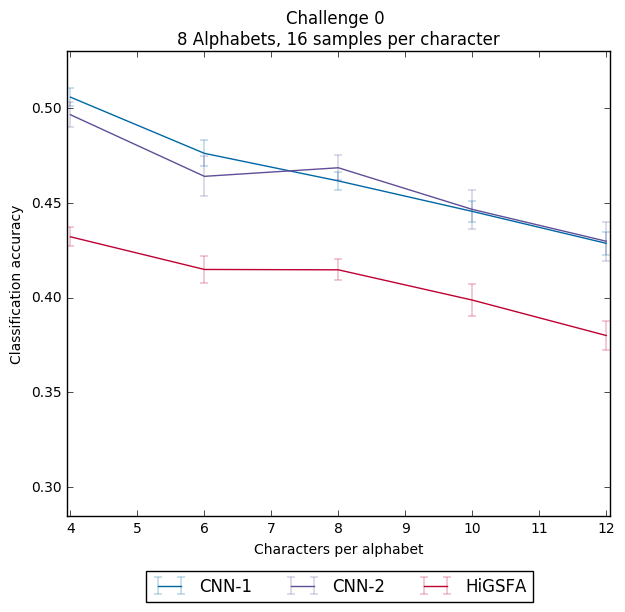

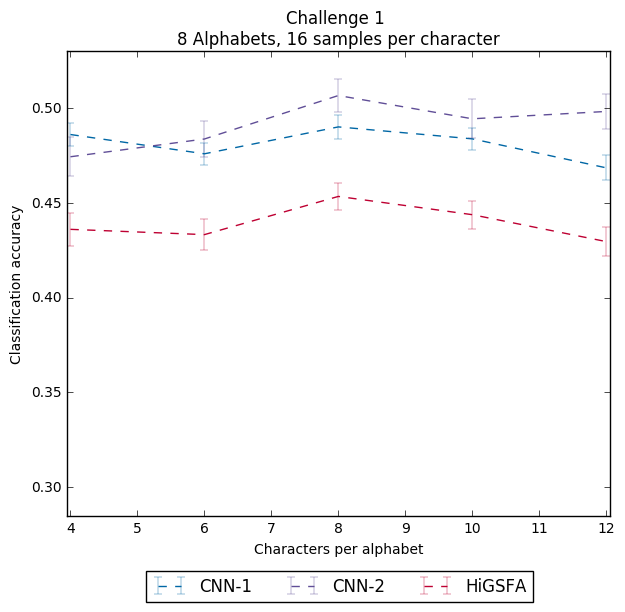

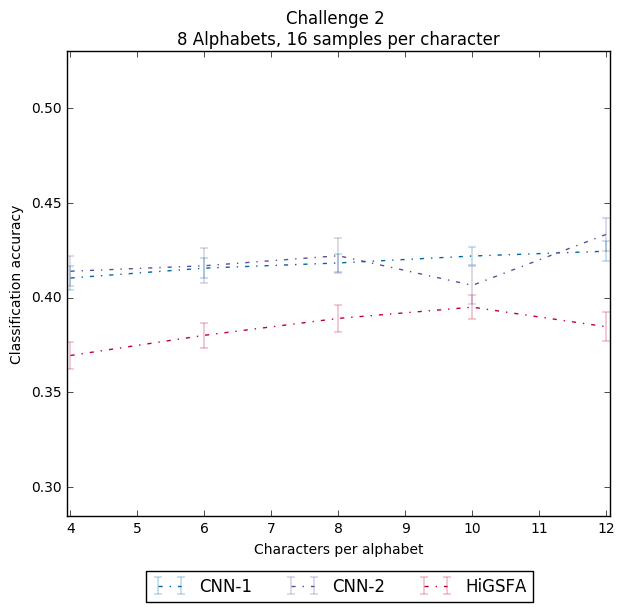

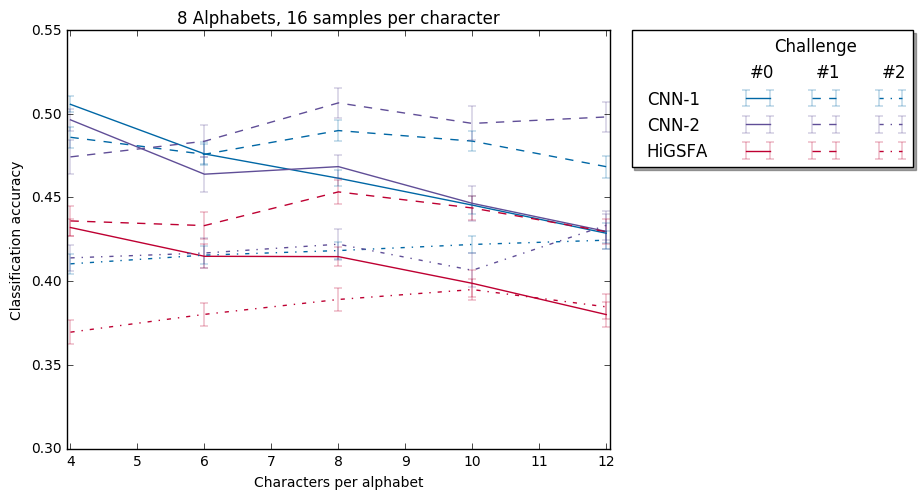

In [13]:
samples_lengths = [4, 6, 8, 10, 12]
title = "Characters per alphabet"
title1 = "8 Alphabets, 16 samples per character"
plot_mnist_errorbars(omniglot_results[0], omniglot_stdev[0], omniglot_results[1], omniglot_stdev[1],
                         omniglot_results[2], omniglot_stdev[2], samples_lengths, title, 
                        "Challenge 0 \n" + title1 )
plot_mnist_errorbars(omniglot_results[3], omniglot_stdev[3], omniglot_results[4], omniglot_stdev[4],
                         omniglot_results[5], omniglot_stdev[5], samples_lengths, title, 
                        "Challenge 1 \n" + title1, '--')
plot_mnist_errorbars(omniglot_results[6], omniglot_stdev[6], omniglot_results[7], omniglot_stdev[7],
                         omniglot_results[8], omniglot_stdev[8], samples_lengths, title, 
                        "Challenge 2 \n" + title1 , '-.')
plot_omniglot_errorbars(omniglot_results[0], omniglot_stdev[0], omniglot_results[1], omniglot_stdev[1],
                         omniglot_results[2], omniglot_stdev[2],
                         omniglot_results[3], omniglot_stdev[3], omniglot_results[4], omniglot_stdev[4],
                         omniglot_results[5], omniglot_stdev[5],
                         omniglot_results[6], omniglot_stdev[6], omniglot_results[7], omniglot_stdev[7],
                         omniglot_results[8], omniglot_stdev[8], samples_lengths,
                         title,
                         title1)